In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar datos actualizados (ajustar ruta)
df = pd.read_csv("./datos_territorio/datos_huella.csv", decimal=".")

In [3]:
# Convertir a numérico
df["Área protegida"] = pd.to_numeric(df["Área protegida"], errors="coerce")

In [4]:
df.loc[df["año"] == 1980, "Área protegida"] = 300

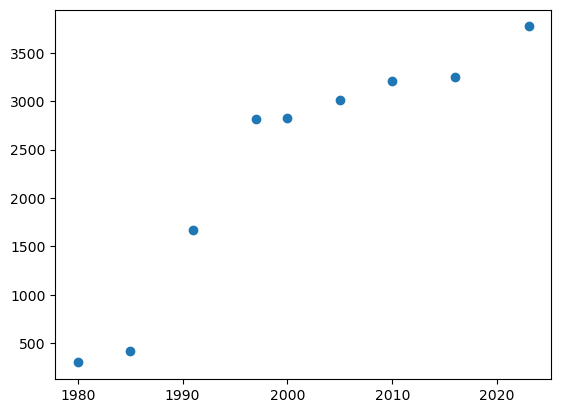

In [5]:
plt.scatter(df["año"], df["Área protegida"], label="Área protegida")

In [6]:
mask_original = df["Área protegida"].notna().copy() 

In [7]:
df.loc[:6, "Área protegida"] = (
    df.set_index("año")["Área protegida"][:6]
    .interpolate(method="linear")  # Interpola linealmente
    .reset_index(drop=True)
)

In [8]:
# Paso 1: Interpolación lineal entre años con datos
df.loc[5:, "Área protegida"] = df["Área protegida"][5:].interpolate(method="spline", order=3)

In [9]:
# Asegurar valores no negativos
df["Área protegida"] = df["Área protegida"].clip(lower=0)

In [10]:
# Paso 3: Redondear a 2 decimales
df["Área protegida"] = df["Área protegida"].round(2)

In [11]:
df[["año", "Área protegida"]].head(10)

,año,Área protegida
0,1980,300.00
1,1981,322.94
2,1982,345.89
3,1983,368.83
4,1984,391.78
5,1985,414.72
6,1986,532.92
7,1987,701.58
8,1988,909.97
9,1989,1147.46


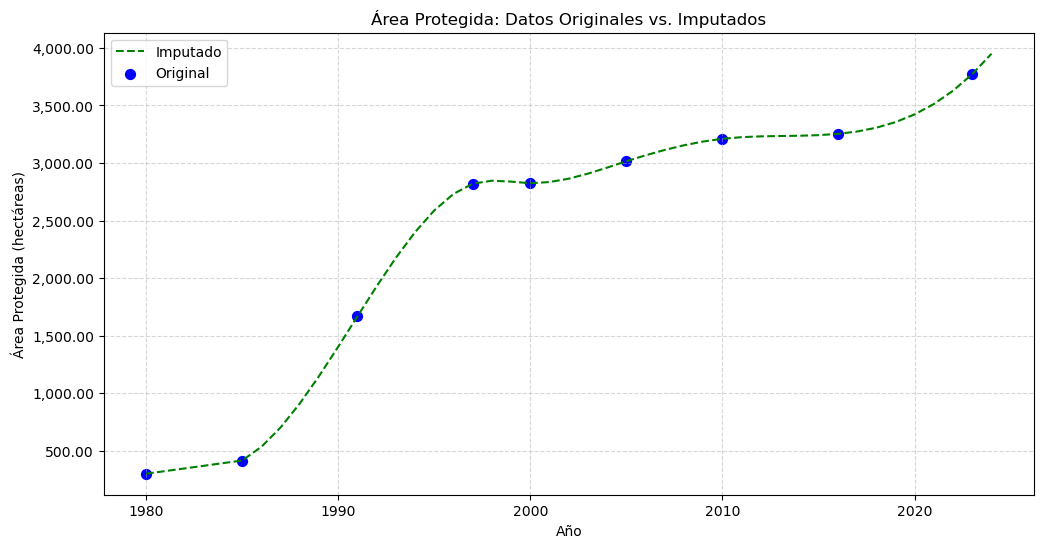

In [12]:
plt.figure(figsize=(12, 6))

# Datos imputados (línea)
plt.plot(
    df["año"], 
    df["Área protegida"], 
    color="green", 
    linestyle="--", 
    label="Imputado"
)

# Datos originales (puntos)
plt.scatter(
    df.loc[mask_original, "año"], 
    df.loc[mask_original, "Área protegida"], 
    color="blue", 
    marker="o", 
    s=50, 
    label="Original"
)

# Personalizar
plt.title("Área Protegida: Datos Originales vs. Imputados")
plt.xlabel("Año")
plt.ylabel("Área Protegida (hectáreas)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

# Formatear ejes con separadores de miles (opcional)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.2f}"))

plt.show()

In [13]:
# Guardar
df.to_csv("./datos_territorio/datos_area_protegida.csv", index=False, encoding="utf-8-sig")